In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 31.98 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Download the collated dataset from Gdrive

In [3]:
!unzip "/content/gdrive/MyDrive/assignment13-data.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: data/assignment13/labels/Himage_052.txt  
  inflating: __MACOSX/data/assignment13/labels/._Himage_052.txt  
  inflating: data/assignment13/labels/Mimg_108.txt  
  inflating: __MACOSX/data/assignment13/labels/._Mimg_108.txt  
  inflating: data/assignment13/labels/z037 .txt  
  inflating: __MACOSX/data/assignment13/labels/._z037 .txt  
  inflating: data/assignment13/labels/images (52).txt  
  inflating: __MACOSX/data/assignment13/labels/._images (52).txt  
  inflating: data/assignment13/labels/Bimg_5.txt  
  inflating: __MACOSX/data/assignment13/labels/._Bimg_5.txt  
  inflating: data/assignment13/labels/images (1).txt  
  inflating: __MACOSX/data/assignment13/labels/._images (1).txt  
  inflating: data/assignment13/labels/Himage_085.txt  
  inflating: __MACOSX/data/assignment13/labels/._Himage_085.txt  
  inflating: data/assignment13/labels/C27.txt  
  inflating: __MACOSX/data/assignment13/labels/._C27.txt  
  inflating: da

## Replace the existing custom data with the collated data from the previous step

In [4]:
! rm -rf /content/YoloV3/data/customdata

In [5]:
!cp -R /content/data/assignment13 /content/YoloV3/data/customdata

## Training Yolov3 model

In [6]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [7]:
ls

data/  gdrive/  __MACOSX/  sample_data/  YoloV3/


In [8]:
cd YoloV3/

/content/YoloV3


In [9]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


## Download the yolov3 weights and copy it to weights folder

In [10]:
!mkdir weights
!cp /content/gdrive/MyDrive/misc_data_assignment13/yolov3-spp-ultralytics.pt weights/yolov3-spp-ultralytics.pt

## Replace the following files with files that match with the custom dataset

In [11]:
!cp /content/gdrive/MyDrive/misc_data_assignment13/yolov3-custom.cfg cfg/yolov3-custom.cfg
!cp /content/gdrive/MyDrive/misc_data_assignment13/custom.data data/customdata/custom.data
!cp /content/gdrive/MyDrive/misc_data_assignment13/test.txt data/customdata/test.txt
!cp /content/gdrive/MyDrive/misc_data_assignment13/train.txt data/customdata/train.txt

## Train yolov3 model on small coco dataset

In [12]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave
# !python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-20 13:03:09.404934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 3089.61it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 124.34it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6842.82it/s

## Train yolo v3 on custom datatset woith images of hardhat,vest,mask and boots.

In [13]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-20 13:03:59.973444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:00<00:00, 7356.92it/s]
Caching images (1.8GB): 100% 3203/3203 [00:19<00:00, 167.19it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318 [

## Make predictions on the custom data

In [20]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/3590 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 1 masks, 3 bootss, Done. (0.043s)
image 2/3590 data/customdata/images/026f0ffddc.jpg: 384x512 1 vests, 1 masks, Done. (0.037s)
image 3/3590 data/customdata/images/032620_LS_covid-masks_inline-680.jpg: 320x512 1 hardhats, 1 masks, Done. (0.033s)
image 4/3590 data/customdata/images/046acbc8e1.jpg: 384x512 1 vests, 1 masks, Done. (0.037s)
image 5/3590 data/customdata/images/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg: 512

## Visualise predictions on custom data

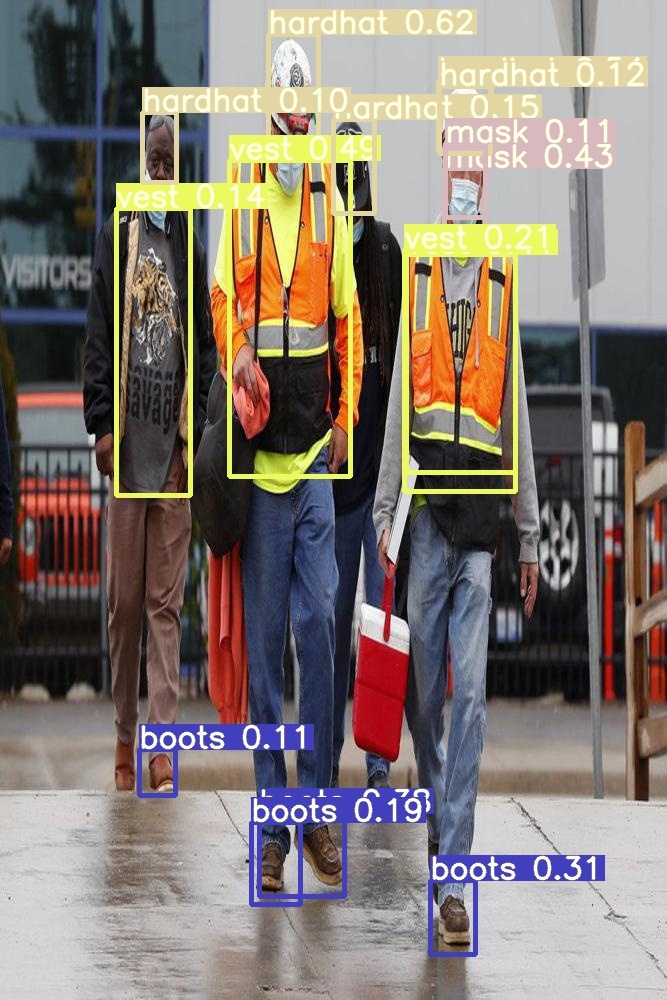

In [16]:
Image(filename='out_out/101.jpg', width=600)

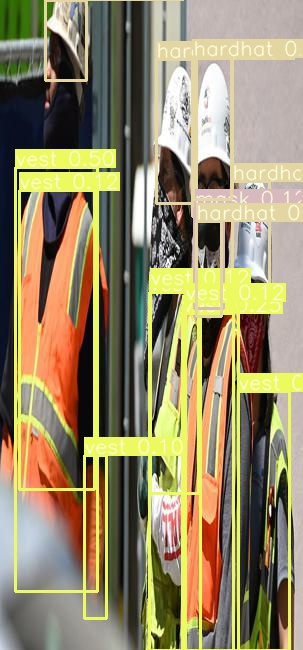

In [17]:
Image(filename='out_out/102.jpg', width=600)

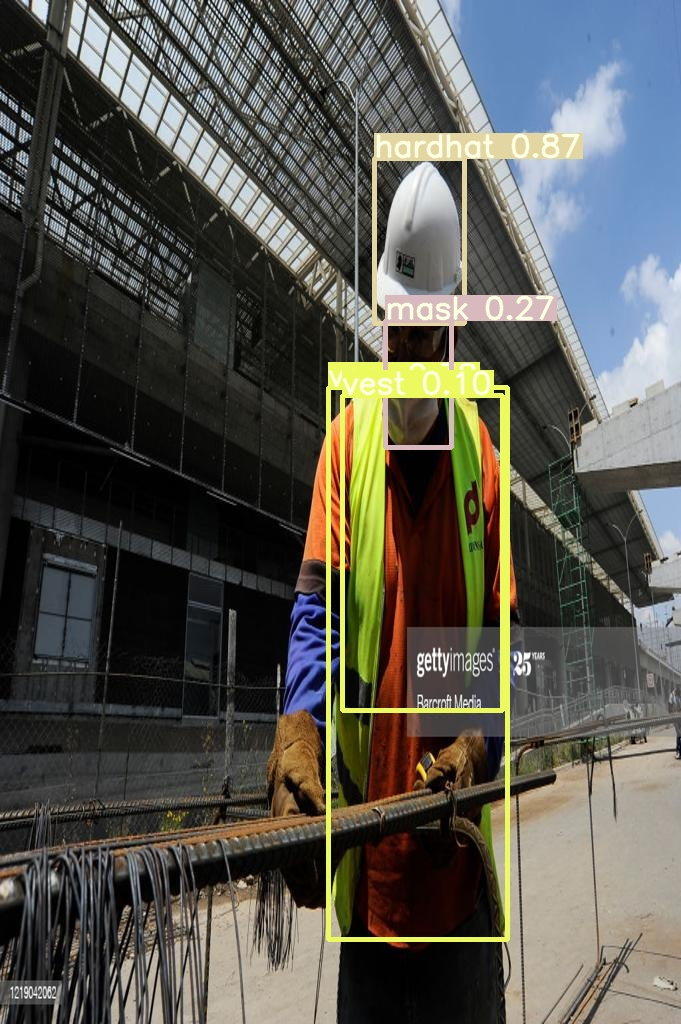

In [18]:
Image(filename='out_out/103.jpg', width=600)

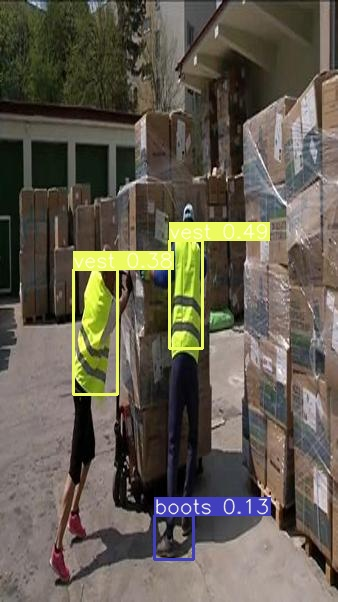

In [19]:
Image(filename='out_out/105.jpg', width=600)

## Predicting on video

In [32]:
!ffmpeg --help

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Converting a video to a sequence of images

In [31]:
!rm -rf video2images

In [33]:
!mkdir video2images
!ffmpeg -i "/content/gdrive/MyDrive/misc_data_assignment13/Hard_Hat_Safety_Demonstration_480p.mp4" -ss 00:01:00 -to 00:01:30 -vf fps=25 /content/YoloV3/video2images/image-%03d.png

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Make precitions on the image sequences using yolo v3 model trained on custom dataset

In [30]:
!rm -rf predictions_on_video_images

In [34]:
!mkdir predictions_on_video_images
!python detect.py --conf-thres 0.1 --source /content/YoloV3/video2images --output /content/YoloV3/predictions_on_video_images

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/YoloV3/predictions_on_video_images', save_txt=False, source='/content/YoloV3/video2images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/750 /content/YoloV3/video2images/image-001.png: 512x320 3 hardhats, 4 vests, 4 bootss, Done. (0.035s)
image 2/750 /content/YoloV3/video2images/image-002.png: 512x320 4 hardhats, 4 vests, 5 bootss, Done. (0.035s)
image 3/750 /content/YoloV3/video2images/image-003.png: 512x320 2 hardhats, 3 vests, 4 bootss, Done. (0.035s)
image 4/750 /content/YoloV3/video2images/image-004.png: 512x320 2 hardhats, 5 vests, 4 bootss, Done. (0.027s)
image 5/750 /content/YoloV3/video2images/imag

## Creating video from images with YoloV3 predictions

In [35]:
!ffmpeg -i /content/YoloV3/predictions_on_video_images/image-%03d.png prediction_video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib